Зачем нужен отбор признаков?

In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Сгенерируем обучающую выборку с объектами двух классов

In [105]:
N = 30
np.random.seed(0)
x0 = np.concatenate((np.random.randn(N/2), np.random.randn(N/2) + 3))
x0 = np.reshape(x0, (N, 1))
x1 = np.random.rand(N)
x1 = np.reshape(x1, (N, 1))
X = np.hstack((x0, x1))
y = np.array((N/2)*[0] + (N/2)*[1])

(-3, 6)

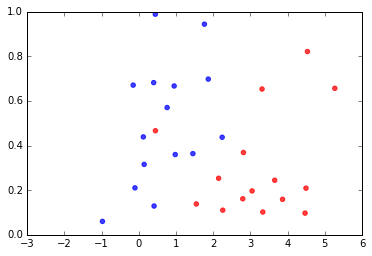

In [106]:
plt.scatter(X[:, 0], X[:, 1], color = np.array(('b', 'r'))[y], alpha = 0.75)
plt.ylim((0, 1))
plt.xlim((-3, 6))

Тестовая выборка:

In [107]:
N_test = 100
x0_test = np.concatenate((np.random.randn(N_test/2), np.random.randn(N_test/2) + 3))
x0_test = np.reshape(x0_test, (N_test, 1))
x1_test = np.random.rand(N_test)
x1_test = np.reshape(x1_test, (N_test, 1))
X_test = np.hstack((x0_test, x1_test))
y_test = np.array((N_test/2)*[0] + (N_test/2)*[1])

Эксперимент:

In [108]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X, y)
y_pred = lda_model.predict(X)
y_test_pred = lda_model.predict(X_test)
print np.mean(y != y_pred)
print np.mean(y_test != y_test_pred)

0.0666666666667
0.14


In [109]:
lda_model.fit(x0, y)
y_pred = lda_model.predict(x0)
y_test_pred = lda_model.predict(x0_test)
print np.mean(y != y_pred)
print np.mean(y_test != y_test_pred)

0.1
0.05


In [110]:
lda_model.fit(x1, y)
y_pred = lda_model.predict(x1)
y_test_pred = lda_model.predict(x1_test)
print np.mean(y != y_pred)
print np.mean(y_test != y_test_pred)

0.333333333333
0.54


Метод $k$-ближайших соседей

In [112]:
from sklearn import neighbors
err_train = []
err_test = []
k_range = range(1, N)
for k in k_range:
    knn_model = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X, y)
    y_pred      = knn_model.predict(X)
    y_test_pred = knn_model.predict(X_test)
    err_train.append(np.mean(y != y_pred))
    err_test.append(np.mean(y_test != y_test_pred))

In [113]:
err0_train = []
err0_test = []
for k in k_range:
    knn_model = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(x0, y)
    y_pred      = knn_model.predict(x0)
    y_test_pred = knn_model.predict(x0_test)
    err0_train.append(np.mean(y != y_pred))
    err0_test.append(np.mean(y_test != y_test_pred))

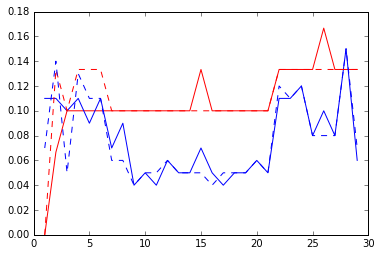

In [114]:
plt.plot(k_range, err_train, 'r')
plt.plot(k_range, err_test, 'b')
plt.plot(k_range, err0_train, 'r--')
plt.plot(k_range, err0_test, 'b--')